# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [ ]:
!pip install pmdarima

In [1]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('/Users/nastya/Documents/Projects/python/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


<AxesSubplot:xlabel='Date'>

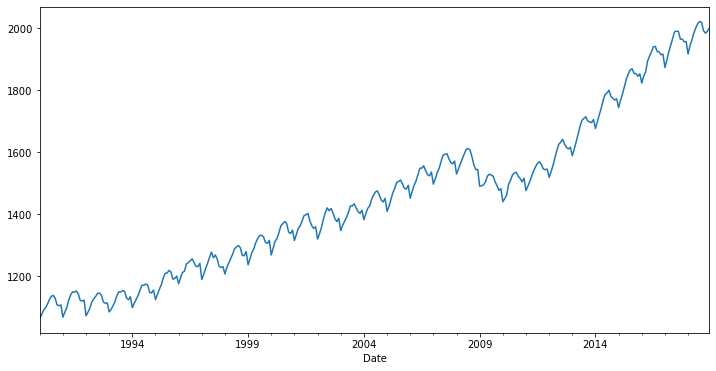

In [2]:
## Постройте график атрибута 'Employees'
df['Employees'].plot(figsize=(12,6))

<AxesSubplot:title={'center':'California Hospitality Industry'}, ylabel='Thousands of Persons'>

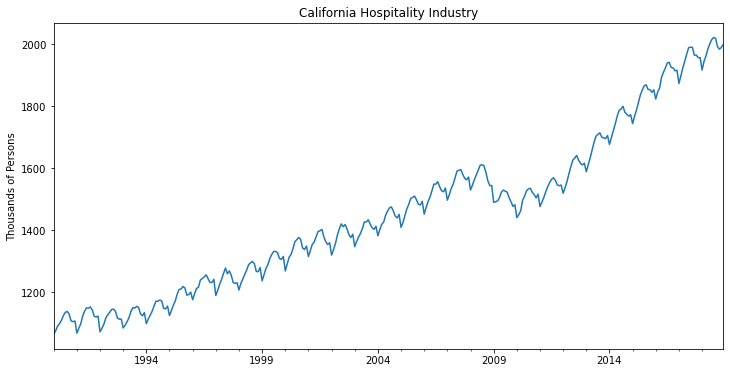

In [3]:
# добавьте заголовок и подписи
df['Employees'].plot(figsize=(12,6), title='California Hospitality Industry', xlabel='', ylabel='Thousands of Persons')

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

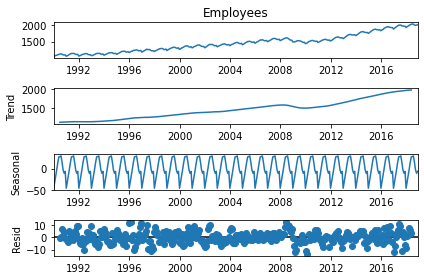

In [4]:
result = seasonal_decompose(df['Employees'], model='add').plot()

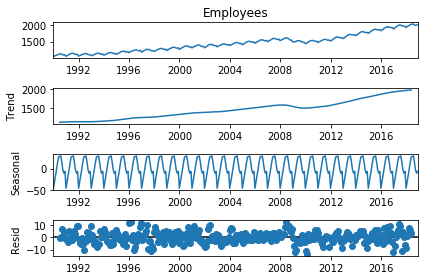

In [11]:
# отобразите результат


### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [ ]:
# Подсказка: используйте auto_arima

In [5]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/ml

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 11 Mar 2022   AIC                           2208.504
Time:                                      23:11:35   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.510      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.443      0.000      -1.082      -0.806
ma.L2          0.1288      0.060      2.139      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    704.643      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.310      0.000      -0.834      -0.664
sigma2        29.2972      1.717     17.060      0.000      25.931      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [6]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [8]:
model = SARIMAX(train['Employees'], order=(1,1,2), seasonal_order=(1,0,[1],12))
results = model.fit()
results.summary()

/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05000D+00    |proj g|=  7.42739D+00

At iterate    5    f=  3.81187D+00    |proj g|=  4.90610D-02

At iterate   10    f=  3.28144D+00    |proj g|=  1.18580D-01

At iterate   15    f=  3.17018D+00    |proj g|=  1.50454D-02

At iterate   20    f=  3.15385D+00    |proj g|=  1.91808D-02

At iterate   25    f=  3.15114D+00    |proj g|=  2.94282D-03

At iterate   30    f=  3.14939D+00    |proj g|=  8.24759D-03

At iterate   35    f=  3.14898D+00    |proj g|=  1.03472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Fri, 11 Mar 2022   AIC                           2128.116
Time:                                      23:14:01   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.044     21.179      0.000       0.839       1.010
ma.L1         -0.9586      0.070    -13.719      0.000      -1.096      -0.822
ma.L2          0.1498      0.060      2.490      0.013       0.032       0.268
ar.S.L12       0.9973      0.001    732.013      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.163      0.000      -0.838      -0.666
sigma2        28.7608      1.684     17.082      0.000      25.461      32.061
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [9]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')
predictions

2018-01-01    1922.287716
2018-02-01    1941.848379
2018-03-01    1959.858060
2018-04-01    1983.209567
2018-05-01    2002.915594
2018-06-01    2019.448349
2018-07-01    2026.313235
2018-08-01    2028.254034
2018-09-01    2009.872951
2018-10-01    2004.780796
2018-11-01    1996.727803
2018-12-01    2000.530456
Freq: MS, Name:  Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12), dtype: float64

In [10]:
for i in range (len(predictions)): #Почему указываем 11.10?
    print(f"predicted={predictions[i]:<11.10}, expected={test['Employees'][i]}")

predicted=1922.287716, expected=1916.8
predicted=1941.848379, expected=1944.5
predicted=1959.85806 , expected=1962.2
predicted=1983.209567, expected=1984.9
predicted=2002.915594, expected=2001.5
predicted=2019.448349, expected=2015.3
predicted=2026.313235, expected=2022.1
predicted=2028.254034, expected=2019.1
predicted=2009.872951, expected=1992.5
predicted=2004.780796, expected=1984.3
predicted=1996.727803, expected=1990.1
predicted=2000.530456, expected=2000.2


### 7. Нарисуйте графики прогнозируемых и известных значений


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousaands of Persons')]

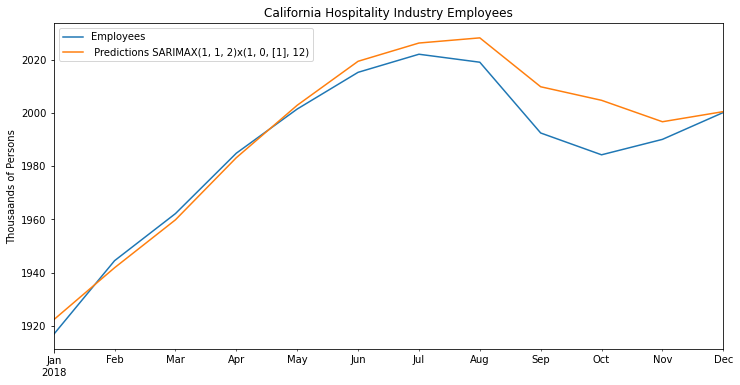

In [11]:
ax = test['Employees'].plot(legend=True, figsize=(12,6), title = 'California Hospitality Industry Employees')
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel='', ylabel='Thousaands of Persons')

### 8. Оцените качество модели с помощью MSE и RMSE


In [12]:
error=mean_squared_error(test['Employees'], predictions)
print(f'SARIMA(1, 1, 2)x(1, 0, [1], 12)MSE Error: {error:11.10}')

SARIMA(1, 1, 2)x(1, 0, [1], 12)MSE Error: 77.63067894


In [13]:
error=rmse(test['Employees'], predictions)
print(f'SARIMA(1, 1, 2)x(1, 0, [1], 12)RMSE Error: {error:11.10}')

SARIMA(1, 1, 2)x(1, 0, [1], 12)RMSE Error:  8.81082737


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [14]:
model = SARIMAX(df['Employees'], order=(1,1,2), seasonal_order=(1,0,[1],12))
results = model.fit()
results.summary()

/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nastya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80614D+00    |proj g|=  6.97483D+00

At iterate    5    f=  3.81314D+00    |proj g|=  5.08436D-02

At iterate   10    f=  3.27944D+00    |proj g|=  2.33545D-01

At iterate   15    f=  3.18051D+00    |proj g|=  2.98168D-02

At iterate   20    f=  3.15944D+00    |proj g|=  7.75418D-03

At iterate   25    f=  3.15714D+00    |proj g|=  4.66907D-03

At iterate   30    f=  3.15590D+00    |proj g|=  1.68703D-03

At iterate   35    f=  3.15590D+00    |proj g|=  5.81026D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 11 Mar 2022   AIC                           2208.504
Time:                                      23:17:56   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.510      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.443      0.000      -1.082      -0.806
ma.L2          0.1288      0.060      2.139      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    704.643      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.310      0.000      -0.834      -0.664
sigma2        29.2972      1.717     17.060      0.000      25.931      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = results.predict(len(df),len(df)+12, type='levels').rename('SARIMA(1, 1, 2)x(1, 0, [1], 12)Forecast')
fcast

2019-01-01    1963.876380
2019-02-01    1986.819611
2019-03-01    2006.002084
2019-04-01    2030.338824
2019-05-01    2050.320295
2019-06-01    2067.146531
2019-07-01    2074.927869
2019-08-01    2076.492099
2019-09-01    2056.902753
2019-10-01    2051.848095
2019-11-01    2047.935383
2019-12-01    2053.901127
2020-01-01    2018.381373
Freq: MS, Name: SARIMA(1, 1, 2)x(1, 0, [1], 12)Forecast, dtype: float64

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

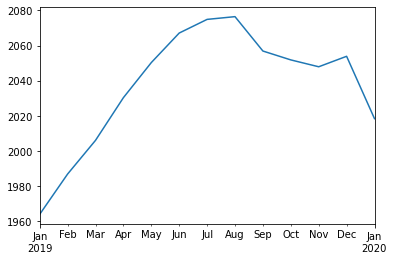

In [16]:
fcast.plot()

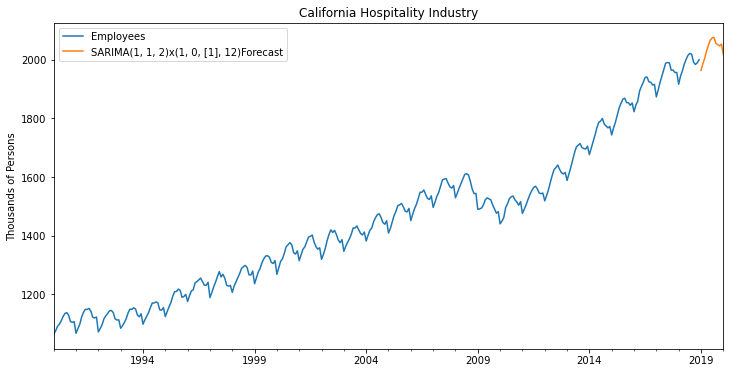

In [17]:
# отобразите общий график
l=df['Employees'].plot(figsize=(12,6), legend=True, title='California Hospitality Industry', xlabel='', ylabel='Thousands of Persons')
fcast.plot(legend=True)
l.autoscale(axis='x', tight=True)